<a href="https://colab.research.google.com/github/JomarQr/Artificial-Intelligence-path/blob/main/Matrix_transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with Matrixes and Solving Equations

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import scipy as sp

1. Visualise a system of equations in 2D:


$5x+y=7$

$-9x-2y=-10$

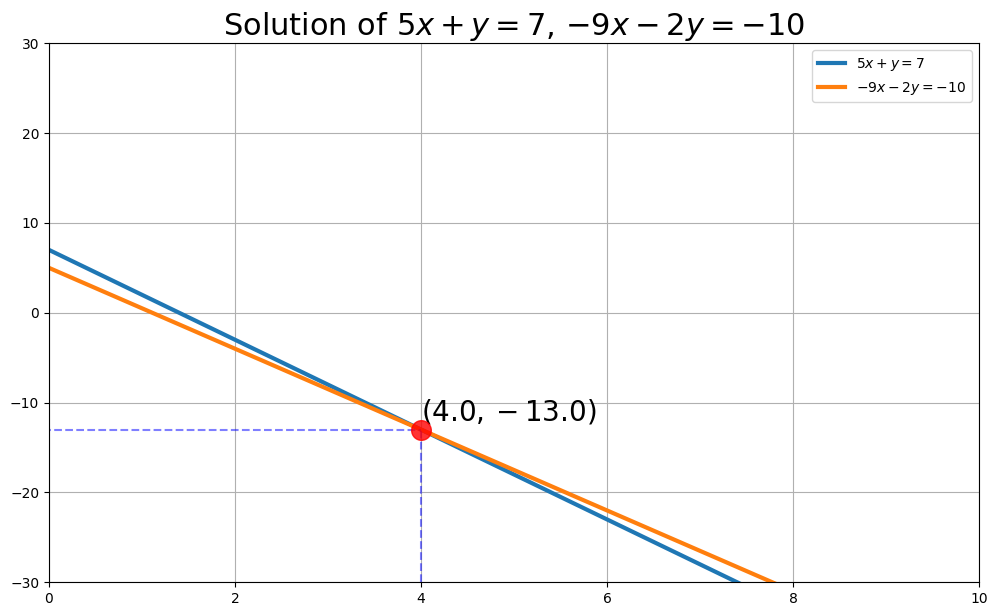

In [ ]:
x = np.linspace(-10, 10, 400)

y1 = 7 - 5*x
y2 = (-10 + 9*x) / -2

fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(x, y1, lw=3, label='$5x + y = 7$')
ax.plot(x, y2, lw=3, label='$-9x - 2y = -10$')

A = np.array([[5, 1], [-9, -2]])
B = np.array([7, -10])
solution = np.linalg.solve(A, B)
x_sol, y_sol = solution

ax.scatter(x_sol, y_sol, s=200, zorder=5, color='r', alpha=0.8)
ax.plot([x_sol, x_sol], [-30, y_sol], ls='--', color='b', alpha=0.5)
ax.plot([-5, x_sol], [y_sol, y_sol], ls='--', color='b', alpha=0.5)

ax.set_xlim([0, 10])
ax.set_ylim([-30, 30])
ax.legend()

s = f'$({x_sol:.1f}, {y_sol:.1f})$'
ax.text(x_sol, y_sol + 1, s, fontsize=20)
ax.set_title('Solution of $5x + y = 7$, $-9x - 2y = -10$', size=22)
ax.grid()

plt.show()

2. Visualise a system of 3 linear equations in 3D (draw 3 planes)

$x-y+5z=6$

$6x+6y-z=0$

$4x-7y+z=-7$

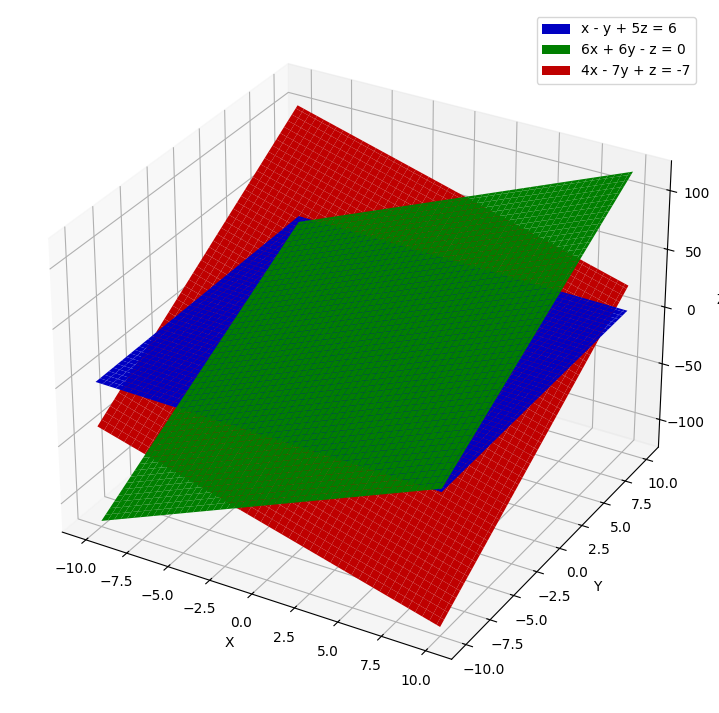

In [ ]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X,  Y = np.meshgrid(x, y)

fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(111, projection = '3d')

Z1 = (6 - X + Y) / 5
ax.plot_surface(X, Y, Z1, color ='blue', alpha = 1,  label='x - y + 5z = 6')

Z2 = 6 * X + 6 * Y
ax.plot_surface(X, Y, Z2, color ='green', alpha = 1, label='6x + 6y - z = 0')

Z3 = -7 + 7*Y - 4*X
ax.plot_surface(X, Y, Z3, color ='red', alpha = 1, label='4x - 7y + z = -7')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()

3. Create 2 3*3 numpy arrays, then:

*   multiply them elementwise
*   perform matrix multiplication in two possible ways(AB and BA), check if it commutes
*   transpose one matrix
*find its inverse
* find $LU$ factorization for this matrix

In [ ]:
A = np.array([[1,2,3], [4,5,6], [7,8,9]])
B = np.array([[9,8,7], [6,5,4], [3,2,1]])

multiply them elementwise

In [ ]:
A*B

array([[ 9, 16, 21],
       [24, 25, 24],
       [21, 16,  9]])

perform matrix multiplication in two possible ways(AB and BA), check if it commutes

In [ ]:
AB = A @ B
print("\n Matrix multiplication AB:\n", AB)


 Matrix multiplication AB:
 [[ 30  24  18]
 [ 84  69  54]
 [138 114  90]]


In [ ]:
BA = B @ A
print("\n Matrix multiplication BA:\n", BA)


 Matrix multiplication BA:
 [[ 90 114 138]
 [ 54  69  84]
 [ 18  24  30]]


In [ ]:
commute = np.array_equal(AB, BA)
print("\nDo A and B commute?", commute)


Do A and B commute? False


transpose one matrix

In [ ]:
A_transp = A.transpose()
A_transp

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

find its inverse

In [ ]:
try:
    A_inverse = np.linalg.inv(A_transp)
    print("\nInverse of A:\n", A_inverse)
except np.linalg.LinAlgError:
    print("\nInverse of A does not exist (matrix is singular).")


Inverse of A does not exist (matrix is singular).


In [ ]:
P, L, U = sp.linalg.lu(A)

In [ ]:
L

array([[1.        , 0.        , 0.        ],
       [0.14285714, 1.        , 0.        ],
       [0.57142857, 0.5       , 1.        ]])

In [ ]:
U

array([[7.        , 8.        , 9.        ],
       [0.        , 0.85714286, 1.71428571],
       [0.        , 0.        , 0.        ]])

In [ ]:
P

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
P @ L @ U

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

find  LU  factorization for this matrix

4. Solve the system $Ux=y$, where
 $$
U = \begin{bmatrix}
2 & -1 & 3 & 4 & 5 \\
0 & 3 & 1 & -2 & 4 \\
0 & 0 & 6 & 2 & -3 \\
0 & 0 & 0 & 1 & 7 \\
0 & 0 & 0 & 0 & 5
\end{bmatrix}, \quad
x = \begin{bmatrix}
x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5
\end{bmatrix}, \quad
y = \begin{bmatrix}
8 \\ 5 \\ 12 \\ 3 \\ 10
\end{bmatrix}
$$
and double-check if the result satisfies the equation.

In [ ]:
U = np.array([[2, -1, 3, 4, 5],
              [0, 3, 1, -2, 4],
              [0, 0, 6, 2, -3],
              [0, 0, 0, 1, 7],
              [0, 0, 0, 0, 5]])
y = ([8, 5, 12, 3, 10])

In [ ]:
x = np.linalg.solve(U,y)

In [ ]:
x

array([  5.72222222, -10.55555556,   6.66666667, -11.        ,
         2.        ])

In [ ]:
U @ x

array([ 8.,  5., 12.,  3., 10.])